In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd code

C:\Users\ainal\OneDrive\Escritorio\IML\clusteringmethods\code


In [9]:
from optics import apply_optics
from preprocessing import preprocess_sick, preprocess_grid, preprocess_vowel
from utils import plot_spectral
import numpy as np
from scipy.io.arff import loadarff
import pandas as pd
from metrics import davies_bouldin_index
from metrics import silhouette_coefficient
from metrics import adjusted_rand_index
from metrics import purity_score
from metrics import f_measure
from metrics import get_metrics_optics

In [63]:
from metrics import get_metrics_optics
import time
def get_all_optics(dataX, dataY):
    res = []
    for metric in ['euclidean', 'manhattan', 'hamming']:
        for algorithm in ['brute', 'ball_tree']:
            for xi in [0.05,0.1]:
                for min_sample in [5,15]:
                    start_time = time.time()
                    labels = apply_optics(dataX, metric, algorithm, xi, min_sample)
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    k = len(np.unique(labels))
                    method= f"optics_k_{k}_distance_{metric}_algorithm_{algorithm}_xi_{xi}_min_{min_sample}"
                    results_optics = get_metrics_optics(dataX, dataY, labels, method, elapsed_time,n_iterations = None)
                    res.append(results_optics)
    return res   

def get_all_optics_definitiu(dataX, dataY, xi=0.05, min_sample=5):
    res = []
    for metric in ['euclidean', 'manhattan', 'hamming']:
        for algorithm in ['brute', 'ball_tree']:
                    start_time = time.time()
                    labels = apply_optics(dataX, metric, algorithm, xi, min_sample)
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    k = len(np.unique(labels))
                    method= f"optics_k_{k}_distance_{metric}_algorithm_{algorithm}_min_{min_sample}"
                    results_optics = get_metrics_optics(dataX, dataY, labels, method, elapsed_time,n_iterations = None)
                    res.append(results_optics)
    return res


In [5]:
df = pd.read_csv('../datasets_processed/grid.csv')
df_X = np.array(df[df.columns[:-1]])
df_y = np.array(df[df.columns[-1]])
labels = apply_optics(df_X, metric="euclidean", algorithm="ball_tree")
#resultados1 = get_all_optics(df_X, df_y)

---------------------------------------------------------------------------------------
Metrics Summary: 
Method: optics_k_2_distance_euclidean_algorithm_ball_tree
ARI: -0.0004947814620964986
Purity: 0.5
F-Measure: 0.5572232645403377
Davies-Bouldin Index: 0.0
Silhouette Coefficient: -0.00040736401003659017
Calinski: 2.5451662155858243e-27
Solving Time: 2.0069985389709473
Iterations: nan
---------------------------------------------------------------------------------------


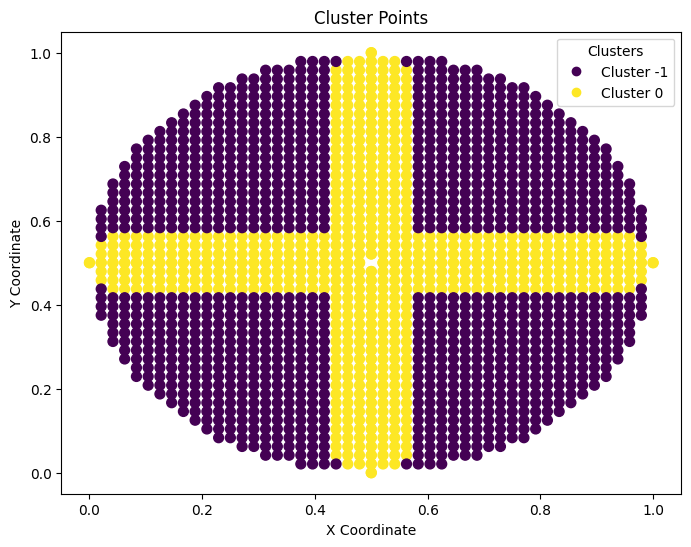

In [10]:
import time
start_time = time.time()
clusters = apply_optics(df_X, metric="euclidean", algorithm="ball_tree")
end_time = time.time()
elapsed_time = end_time - start_time
metric = "euclidean"
algorithm = "ball_tree"
k = len(np.unique(clusters))
methodused = f"optics_k_{k}_distance_{metric}_algorithm_{algorithm}"
metrics = get_metrics_optics(df_X, df_y, clusters, methodused, elapsed_time, False)
print("---------------------------------------------------------------------------------------")
print("Metrics Summary: ")
for key, value in metrics.items():
    print(f"{key}: {value}")
print("---------------------------------------------------------------------------------------")

plot_spectral(df_X, clusters)

In [13]:
results_grid = pd.DataFrame(resultados1)


In [15]:
print(results_grid.columns.tolist())

['Method', 'ARI', 'Purity', 'F-Measure', 'Davies-Bouldin Index', 'Silhouette Coefficient', 'Calinski', 'Solving Time', 'Iterations']


In [16]:
results_grid.sort_values(by="Silhouette Coefficient", ascending=False)

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
1,optics_k_2_distance_euclidean_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.817007,NaN
3,optics_k_2_distance_euclidean_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.685002,NaN
5,optics_k_2_distance_euclidean_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.370450,NaN
7,optics_k_2_distance_euclidean_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.661969,NaN
9,optics_k_2_distance_manhattan_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.739964,NaN
11,optics_k_2_distance_manhattan_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.632964,NaN
13,optics_k_2_distance_manhattan_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.445964,NaN
15,optics_k_2_distance_manhattan_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.992003,NaN
0,optics_k_1_distance_euclidean_algorithm_brute_...,NaN,NaN,NaN,NaN,NaN,NaN,2.593099,NaN
2,optics_k_1_distance_euclidean_algorithm_brute_...,NaN,NaN,NaN,NaN,NaN,NaN,4.112985,NaN


In [18]:
results_grid.sort_values(by="Calinski", ascending=False)

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
1,optics_k_2_distance_euclidean_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.817007,NaN
3,optics_k_2_distance_euclidean_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.685002,NaN
5,optics_k_2_distance_euclidean_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.370450,NaN
7,optics_k_2_distance_euclidean_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.661969,NaN
9,optics_k_2_distance_manhattan_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.739964,NaN
11,optics_k_2_distance_manhattan_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.632964,NaN
13,optics_k_2_distance_manhattan_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.445964,NaN
15,optics_k_2_distance_manhattan_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.992003,NaN
0,optics_k_1_distance_euclidean_algorithm_brute_...,NaN,NaN,NaN,NaN,NaN,NaN,2.593099,NaN
2,optics_k_1_distance_euclidean_algorithm_brute_...,NaN,NaN,NaN,NaN,NaN,NaN,4.112985,NaN


Best xi = 0.05 and best min_samples = 15 --> we fix them for the grid dataset 

In [66]:
results_grid = get_all_optics_definitiu(df_X, df_y, xi=0.05, min_sample=15)

In [67]:
results_grid = pd.DataFrame(results_grid)

In [23]:
results_grid

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,optics_k_2_distance_euclidean_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,2.645004,NaN
1,optics_k_2_distance_euclidean_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.856035,NaN
2,optics_k_2_distance_manhattan_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.950969,NaN
3,optics_k_2_distance_manhattan_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.891001,NaN
4,optics_k_1_distance_hamming_algorithm_brute_xi...,NaN,NaN,NaN,NaN,NaN,NaN,2.136033,NaN
5,optics_k_1_distance_hamming_algorithm_ball_tre...,NaN,NaN,NaN,NaN,NaN,NaN,1.704967,NaN


In [60]:
df = pd.read_csv('../datasets_processed/sick.csv')
df_X = np.array(df[df.columns[:-1]])
df_y = np.array(df[df.columns[-1]])

#resultados = get_all_optics(df_X, df_y)
#results_sick= pd.DataFrame(resultados)


In [31]:
results_sick.sort_values(by="Silhouette Coefficient", ascending=False)

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
15,optics_k_36_distance_manhattan_algorithm_ball_...,0.001143,0.962069,0.376035,1.359566,0.438066,192.993318,4.585033,NaN
11,optics_k_36_distance_manhattan_algorithm_brute...,0.001143,0.962069,0.376035,1.359566,0.438066,192.993318,4.774965,NaN
7,optics_k_37_distance_euclidean_algorithm_ball_...,0.000951,0.962069,0.375348,1.375673,0.431415,180.565609,5.919556,NaN
3,optics_k_37_distance_euclidean_algorithm_brute...,0.000963,0.962069,0.375691,1.375707,0.431234,180.138163,10.246961,NaN
1,optics_k_38_distance_euclidean_algorithm_brute...,0.002183,0.962069,0.494339,1.312972,0.278428,126.093991,6.135001,NaN
5,optics_k_38_distance_euclidean_algorithm_ball_...,0.002183,0.962069,0.494339,1.312582,0.278212,126.320969,6.859074,NaN
9,optics_k_38_distance_manhattan_algorithm_brute...,0.001315,0.962069,0.523044,1.274254,0.240755,120.524518,4.612968,NaN
13,optics_k_38_distance_manhattan_algorithm_ball_...,0.001315,0.962069,0.523044,1.274254,0.240755,120.524518,4.054001,NaN
23,optics_k_4_distance_hamming_algorithm_ball_tre...,-0.003101,0.961008,0.796517,2.770429,0.146808,226.692877,4.659051,NaN
21,optics_k_4_distance_hamming_algorithm_ball_tre...,-0.003101,0.961008,0.796517,2.770429,0.146808,226.692877,4.915607,NaN


In [32]:
results_sick.sort_values(by="Calinski", ascending=False)

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
23,optics_k_4_distance_hamming_algorithm_ball_tre...,-0.003101,0.961008,0.796517,2.770429,0.146808,226.692877,4.659051,NaN
21,optics_k_4_distance_hamming_algorithm_ball_tre...,-0.003101,0.961008,0.796517,2.770429,0.146808,226.692877,4.915607,NaN
17,optics_k_4_distance_hamming_algorithm_brute_xi...,-0.003101,0.961008,0.796517,2.770429,0.146808,226.692877,5.524003,NaN
19,optics_k_4_distance_hamming_algorithm_brute_xi...,-0.003101,0.961008,0.796517,2.770429,0.146808,226.692877,5.619125,NaN
11,optics_k_36_distance_manhattan_algorithm_brute...,0.001143,0.962069,0.376035,1.359566,0.438066,192.993318,4.774965,NaN
15,optics_k_36_distance_manhattan_algorithm_ball_...,0.001143,0.962069,0.376035,1.359566,0.438066,192.993318,4.585033,NaN
7,optics_k_37_distance_euclidean_algorithm_ball_...,0.000951,0.962069,0.375348,1.375673,0.431415,180.565609,5.919556,NaN
3,optics_k_37_distance_euclidean_algorithm_brute...,0.000963,0.962069,0.375691,1.375707,0.431234,180.138163,10.246961,NaN
5,optics_k_38_distance_euclidean_algorithm_ball_...,0.002183,0.962069,0.494339,1.312582,0.278212,126.320969,6.859074,NaN
1,optics_k_38_distance_euclidean_algorithm_brute...,0.002183,0.962069,0.494339,1.312972,0.278428,126.093991,6.135001,NaN


In [35]:
results_sick.sort_values(by="Davies-Bouldin Index", ascending=True)

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
2,optics_k_127_distance_euclidean_algorithm_brut...,0.010023,0.962599,0.804842,0.974252,-0.357696,18.031331,10.374047,NaN
6,optics_k_124_distance_euclidean_algorithm_ball...,0.010942,0.962599,0.807530,0.976896,-0.360328,17.868321,6.299838,NaN
14,optics_k_124_distance_manhattan_algorithm_ball...,0.001997,0.962599,0.782112,0.997101,-0.309040,18.922258,3.989981,NaN
10,optics_k_124_distance_manhattan_algorithm_brut...,0.001997,0.962599,0.782112,0.997101,-0.309040,18.922258,4.554605,NaN
8,optics_k_160_distance_manhattan_algorithm_brut...,0.000978,0.962599,0.753353,1.033280,-0.294547,17.459882,5.034966,NaN
12,optics_k_160_distance_manhattan_algorithm_ball...,0.000978,0.962599,0.753353,1.033280,-0.294547,17.459882,4.102967,NaN
0,optics_k_168_distance_euclidean_algorithm_brut...,0.007609,0.962599,0.755707,1.033413,-0.299562,16.025257,7.177000,NaN
4,optics_k_166_distance_euclidean_algorithm_ball...,0.010104,0.962599,0.761550,1.037745,-0.309985,15.366121,6.949504,NaN
9,optics_k_38_distance_manhattan_algorithm_brute...,0.001315,0.962069,0.523044,1.274254,0.240755,120.524518,4.612968,NaN
13,optics_k_38_distance_manhattan_algorithm_ball_...,0.001315,0.962069,0.523044,1.274254,0.240755,120.524518,4.054001,NaN


In [64]:
    resultados = get_all_optics_definitiu(df_X, df_y, xi =0.05, min_sample=15)
results_sick= pd.DataFrame(resultados)

In [68]:
df = pd.read_csv('../datasets_processed/vowel.csv')
df_X = np.array(df[df.columns[:-1]])
df_y = np.array(df[df.columns[-1]])

#resultados = get_all_optics(df_X, df_y)
#results_vowel = pd.DataFrame(resultados)

In [41]:
results_vowel.sort_values(by="Silhouette Coefficient", ascending=False)

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
21,optics_k_14_distance_hamming_algorithm_ball_tr...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,0.864018,NaN
20,optics_k_14_distance_hamming_algorithm_ball_tr...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,0.946976,NaN
17,optics_k_14_distance_hamming_algorithm_brute_x...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,1.061002,NaN
16,optics_k_14_distance_hamming_algorithm_brute_x...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,1.088996,NaN
11,optics_k_16_distance_manhattan_algorithm_brute...,-0.000299,0.116162,0.140826,1.300938,0.399283,160.935005,0.709996,NaN
15,optics_k_16_distance_manhattan_algorithm_ball_...,-0.000299,0.116162,0.140826,1.300938,0.399283,160.935005,0.826977,NaN
3,optics_k_16_distance_euclidean_algorithm_brute...,0.002829,0.121212,0.146415,1.307910,0.396796,162.901246,1.097994,NaN
7,optics_k_16_distance_euclidean_algorithm_ball_...,0.002829,0.121212,0.146415,1.307910,0.396796,162.901246,0.994884,NaN
8,optics_k_130_distance_manhattan_algorithm_brut...,0.081579,0.792929,0.283663,1.087177,0.345505,31.493333,0.653959,NaN
12,optics_k_130_distance_manhattan_algorithm_ball...,0.081579,0.792929,0.283663,1.087177,0.345505,31.493333,0.792001,NaN


In [42]:
results_vowel.sort_values(by="Calinski", ascending=False)

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
21,optics_k_14_distance_hamming_algorithm_ball_tr...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,0.864018,NaN
20,optics_k_14_distance_hamming_algorithm_ball_tr...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,0.946976,NaN
17,optics_k_14_distance_hamming_algorithm_brute_x...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,1.061002,NaN
16,optics_k_14_distance_hamming_algorithm_brute_x...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,1.088996,NaN
3,optics_k_16_distance_euclidean_algorithm_brute...,0.002829,0.121212,0.146415,1.307910,0.396796,162.901246,1.097994,NaN
7,optics_k_16_distance_euclidean_algorithm_ball_...,0.002829,0.121212,0.146415,1.307910,0.396796,162.901246,0.994884,NaN
15,optics_k_16_distance_manhattan_algorithm_ball_...,-0.000299,0.116162,0.140826,1.300938,0.399283,160.935005,0.826977,NaN
11,optics_k_16_distance_manhattan_algorithm_brute...,-0.000299,0.116162,0.140826,1.300938,0.399283,160.935005,0.709996,NaN
1,optics_k_21_distance_euclidean_algorithm_brute...,0.033462,0.175758,0.224356,1.322908,0.218134,76.321285,0.880000,NaN
5,optics_k_21_distance_euclidean_algorithm_ball_...,0.032907,0.175758,0.224620,1.323423,0.217561,76.002809,1.023475,NaN


In [43]:
results_vowel.sort_values(by="Davies-Bouldin Index", ascending=True)

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
21,optics_k_14_distance_hamming_algorithm_ball_tr...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,0.864018,NaN
17,optics_k_14_distance_hamming_algorithm_brute_x...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,1.061002,NaN
16,optics_k_14_distance_hamming_algorithm_brute_x...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,1.088996,NaN
20,optics_k_14_distance_hamming_algorithm_ball_tr...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,0.946976,NaN
14,optics_k_124_distance_manhattan_algorithm_ball...,0.084078,0.771717,0.321482,1.058926,0.318211,27.811362,0.742002,NaN
10,optics_k_124_distance_manhattan_algorithm_brut...,0.084078,0.771717,0.321482,1.058926,0.318211,27.811362,0.758002,NaN
2,optics_k_123_distance_euclidean_algorithm_brut...,0.101696,0.774747,0.351448,1.069348,0.297428,24.906509,0.892999,NaN
6,optics_k_123_distance_euclidean_algorithm_ball...,0.101696,0.774747,0.351448,1.069348,0.297428,24.906509,1.053347,NaN
4,optics_k_131_distance_euclidean_algorithm_ball...,0.099400,0.807071,0.295431,1.081736,0.343103,30.961006,0.977889,NaN
0,optics_k_131_distance_euclidean_algorithm_brut...,0.098472,0.806061,0.295363,1.081737,0.341238,30.738965,0.950999,NaN


In [69]:
resultados = get_all_optics_definitiu(df_X, df_y, xi =0.05, min_sample=15)
results_vowel= pd.DataFrame(resultados)

In [71]:
results_grid.to_csv('../output/optics_grid.csv')
results_vowel.to_csv('../output/optics_vowel.csv')


In [72]:
results_sick.to_csv('../output/optics_sick.csv')

In [70]:
results_grid

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,optics_k_2_distance_euclidean_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,3.328799,NaN
1,optics_k_2_distance_euclidean_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.740963,NaN
2,optics_k_2_distance_manhattan_algorithm_brute_...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.953938,NaN
3,optics_k_2_distance_manhattan_algorithm_ball_t...,-0.000495,0.5,0.557223,0.0,-0.000407,2.545166e-27,1.767003,NaN
4,optics_k_1_distance_hamming_algorithm_brute_mi...,NaN,NaN,NaN,NaN,NaN,NaN,2.159036,NaN
5,optics_k_1_distance_hamming_algorithm_ball_tre...,NaN,NaN,NaN,NaN,NaN,NaN,1.513000,NaN


In [62]:
results_sick

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,optics_k_38_distance_euclidean_algorithm_brute...,0.002183,0.962069,0.494339,1.312972,0.278428,126.093991,6.735715,NaN
1,optics_k_38_distance_euclidean_algorithm_ball_...,0.002183,0.962069,0.494339,1.312582,0.278212,126.320969,8.497546,NaN
2,optics_k_38_distance_manhattan_algorithm_brute...,0.001315,0.962069,0.523044,1.274254,0.240755,120.524518,5.020995,NaN
3,optics_k_38_distance_manhattan_algorithm_ball_...,0.001315,0.962069,0.523044,1.274254,0.240755,120.524518,5.379642,NaN
4,optics_k_4_distance_hamming_algorithm_brute_xi...,-0.003101,0.961008,0.796517,2.770429,0.146808,226.692877,6.064101,NaN
5,optics_k_4_distance_hamming_algorithm_ball_tre...,-0.003101,0.961008,0.796517,2.770429,0.146808,226.692877,5.516955,NaN


In [49]:
results_vowel

,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,optics_k_21_distance_euclidean_algorithm_brute...,0.033462,0.175758,0.224356,1.322908,0.218134,76.321285,2.109996,NaN
1,optics_k_21_distance_euclidean_algorithm_ball_...,0.032907,0.175758,0.224620,1.323423,0.217561,76.002809,0.996999,NaN
2,optics_k_18_distance_manhattan_algorithm_brute...,0.039836,0.167677,0.233209,1.347357,0.141649,68.331510,0.717002,NaN
3,optics_k_18_distance_manhattan_algorithm_ball_...,0.039836,0.167677,0.233209,1.347357,0.141649,68.331510,0.769001,NaN
4,optics_k_14_distance_hamming_algorithm_brute_x...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,0.949999,NaN
5,optics_k_14_distance_hamming_algorithm_ball_tr...,-0.011253,0.090909,0.108108,0.933813,0.535939,271.771836,0.795998,NaN
